# Recommendation Systems

![Recommend GIF](https://media.giphy.com/media/3o6MbsRPT4UmZ70IsU/giphy.gif)

How does Netflix know what shows you may like? How does Youtube suggest videos on your homepage that 80% of the time you are inclined to click on and watch? It's all because of recommendation systems. To explain it in the most basic terminology,recommendation systems are programs or softwares that take your interests in consideration and suggest or recommend products that you may end up liking.

![MADE WITH ♥](https://forthebadge.com/images/badges/built-with-love.svg)
As an appetizer, here's a [product recommendation system prototype](https://productrecom-n.herokuapp.com/). Click on the images to get recommendations. This is an application that recommends products using transfer learning. Amazon, Flipkart use such recommenders.

## Importance of recommendation systems

* They help in discovering content that you may possibly like but didn't know existed.
* They create personalized list of options for your viewing.
* Help in discovering popular content.
* They can make you watch/read/listen to content that is not really into your domain but you may end up liking it and discovering an all new domain that you like.
* If you are a creator, recommendation systems can you give you a brief overview about your audience.

# Architecture of Recommendation systems

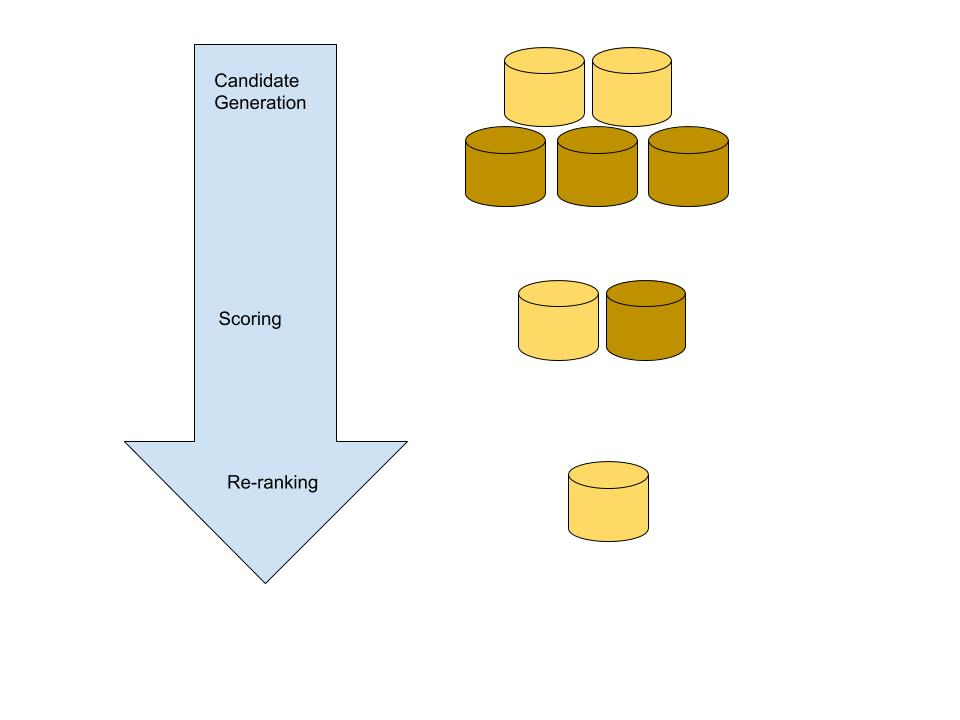

**Candidate generation**:
    Usually a large corpus of data is available but it has a smaller number of candidates or categories.Generation and differentitation of these categories is the first step of building the recommendation system.
    
    
**Scoring**:
    Scoring is the model that creates subsets and ranks the categories to be displayed to the user. The customization of scoring of categories can be done using conditions or queries.
    
    
**Re-ranking**:
    The final step, re-ranking considers all available constraints and removes unwanted or low-scoring recommendations. Re-ranking is extremely important as it filters all unnecessary items.
    

# Did you know?

About 35% purchases made from amazon are from recommendation systems.

In [1]:
import plotly.graph_objects as go
import plotly.offline as py
autosize =False


# Use `hole` to create a donut-like pie chart
values=[35, 65]
labels=['Recommended Purchases',"Original Purchases"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=15,
                  marker=dict(colors=['#00008b','#000'], line=dict(color='#FFFFFF', width=2.5)))
fig.update_layout(
    title='Recommended Purchases VS Original')
py.iplot(fig)

# Types

1. Content based recommendation systems:


Content based recommendation systems focus on properties of items.These recommendation systems use features between the given items and find similarities between them as a measure for giving recommendations.For example, if a user likes the first installment of The Harry Potter movies, the recommendation system will probably recommended all the other installments. Another example can be the recommendation of a 20 min workout video on youtube because you have watched a 10 min workout video posted by the same creator.User reviews are not required in this type.
2. Collaborative filtering recommendation systems:


On the other hand, systems focus on the relationship between users and items. These models require user reviews as they play a key role in scoring.Collaborative filtering models can recommend an item to user A based on the interests of a similar user B. User's previous history is also taken into consideration. For example, recommendation of a crime tv series to user A because user B who has watched similar shows as of User A has reviewed the crime series. 

# Content based recommendation systems

Item profiles:

In content based recommendation systems, each item has a profile. In most cases, profiles contain characteristics of the item that are easily available or discovered.
For example, these features can be used in profiles of movies/tv shows on netflix.
* Title
* Actors in the movie/tv show
* Director
* Genre
* Plot/Storyline

****Representing Item Profiles****

The ultimate goal in content based recommendation systems, is creating an item profile. Here, the TF-IDF Concept comes into picture.

TF-IDF:
TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. It was originally developed for document search and information retrieval.But, over the years, it is used in recommendation systems and machine learning models too.

How does TF-IDF work?
It calculates term frequency of a word in a document.


![CHECK IT OUT](https://forthebadge.com/images/badges/check-it-out.svg)
For a hands-on implementation of content based recommendation systems using the TF-IDF vectorizer method, [Click here](https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda#Recommendation-System-(Content-Based))

Ever wondered how ecommerce websites use recommendation systems to show you similar sets of items? [Click here ](https://productrecom-n.herokuapp.com/) for a small model or working prototype of the product recommendations by ecommerce websites.

# Collaborative Filtering 

This is a significantly different approach to recommendation.
Instead of using features of items to determine their similarity, we focus on the
similarity of the user ratings for two items. That is, in place of the item-profile
vector for an item, we use its column in the utility matrix.

## Measuring Similarity

The first question we must deal with is how to measure similarity of users or
items from their rows or columns in the utility matrix. Utility matrix is the matrix where rows represent user ratings or any such feature and columns represent movie/items.

Consider the following utility matrix:
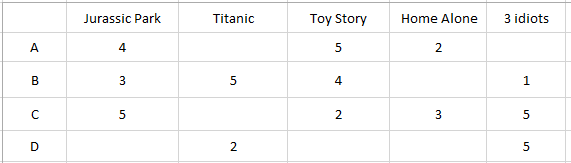

Here A,B,C,D are the users and the column headers are the movies.The values in the matrix denote ratings.

Cosine similarity is finding the cosine distance between two users. It is similar to dot product of two vectors. Blanks are treated as 0.
![COS](https://i.stack.imgur.com/36r1U.png)

Let us calculate similarity between User A and User B:

cos angle between A and B= ((4*3)+(5*4))/sqrt(4^2+5^2+2^2)*sqrt(3^2+5^2+4^2+1^2)

This is how cosine similarity is calculated. After calculating the cosine similarites, an algorithm like Kmeans or Decision tree can be applied to the data to get the nearest neighbors as recommendations.

For a hands-on implementation on collaborative filtering, [CLICK HERE](https://www.kaggle.com/niharika41298/netflix-or-books-recommender-analysis-eda#2.-Collaborative-Filtering)

# Hybrid recommendation systems.

A hybrid recommender is a special kind of recommender that uses both collaborative and content based filtering for making recommendations.

## Fact:
75% of what people are watching on Netflix comes from recommendations, according to McKinsey and Recommendations are responsible for 70% of the time people spend watching videos on YouTube.


In [2]:
# Use `hole` to create a donut-like pie chart
values=[75, 25]
labels=['Recommended Content',"Originals"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=15,
                  marker=dict(colors=['#DAA520','#800000'], line=dict(color='#FFFFFF', width=2.5)))
fig.update_layout(
    title='Recommended Views VS Original')
austosize=False
py.iplot(fig)

# LightFM Hybrid recommender

LightFM is a Python implementation of a number of popular recommendation algorithms for both implicit and explicit feedback.

It also makes it possible to incorporate both item and user metadata into the traditional matrix factorization algorithms.

The below implementation is using the pre-existing dataset of movielens provided by LIGHTFM libraries.

In [3]:
import numpy as np
from lightfm.data import Dataset
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
from lightfm.datasets import fetch_movielens
from lightfm.cross_validation import random_train_test_split
from scipy.sparse import coo_matrix as sp

In [4]:
data = fetch_movielens(min_rating = 4.0)

Only using movies with ratings above 4.0

In [5]:
print(repr(data['train']))
print(repr(data['test']))

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 49906 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 5469 stored elements in COOrdinate format>


In [6]:
model = LightFM(loss = 'warp')

In [7]:
model.fit(data["train"], epochs=30, num_threads=2)

In [8]:
def sample_recommendation(model, data, user_ids):
    n_users, n_items = data['train'].shape
    for user_id in user_ids:
        known_positives = data['item_labels'][data['train'].tocsr()                                    
                          [user_id].indices]
        
        scores = model.predict(user_id, np.arange(n_items))

        top_items = data['item_labels'][np.argsort(-scores)]

        print("User %s" % user_id)
        print("     Known positives:")
        
        for x in known_positives[:3]:
            print("        %s" % x)
        
        print("     Recommended:")
        
        for x in top_items[:3]:
            print("        %s" % x)

Creating a recommendation function to recommend 3 movies based on known positives.

In [9]:
sample_recommendation(model, data, [6, 25, 451])

User 6
     Known positives:
        Get Shorty (1995)
        Twelve Monkeys (1995)
        Babe (1995)
     Recommended:
        Raiders of the Lost Ark (1981)
        Blade Runner (1982)
        Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
User 25
     Known positives:
        Dead Man Walking (1995)
        Star Wars (1977)
        Fargo (1996)
     Recommended:
        Contact (1997)
        Fargo (1996)
        Titanic (1997)
User 451
     Known positives:
        Twelve Monkeys (1995)
        Babe (1995)
        Mr. Holland's Opus (1995)
     Recommended:
        Raiders of the Lost Ark (1981)
        Casablanca (1942)
        Star Wars (1977)


Generating recommendations ^

This is very easy as the dataset is already provided by lightFM.

## LightFM for the goodreads books dataset

In [10]:
import pandas as pd
import numpy as np

In [11]:
books=pd.read_csv("../input/goodbooks-10k-updated/books.csv")

Some Data exploration before getting recommendations is always a good idea.

In [12]:
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


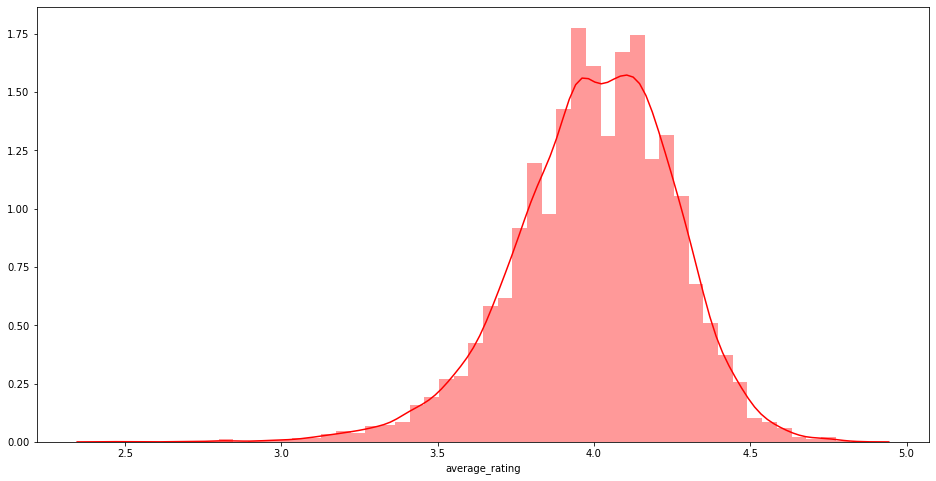

In [13]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.distplot(a=books['average_rating'], kde=True, color='r')

In [14]:
dropna= books.dropna()
fig = px.treemap(dropna, path=['original_publication_year','language_code', "average_rating"],
                  color='average_rating')
fig.show()

In [15]:
fig = px.line(books, y="books_count", x="average_rating", title='Book Count VS Average Rating')
fig.show()

In [16]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

Only selecting important columns.

In [17]:
books_metadata_selected = books[['book_id', 'average_rating', 
'original_publication_year', 'ratings_count', 'language_code']]
books_metadata_selected

,book_id,average_rating,original_publication_year,ratings_count,language_code
0,1,4.34,2008.0,4780653,eng
1,2,4.44,1997.0,4602479,eng
2,3,3.57,2005.0,3866839,en-US
3,4,4.25,1960.0,3198671,eng
4,5,3.89,1925.0,2683664,eng
...,...,...,...,...,...
9995,9996,4.09,2010.0,17204,eng
9996,9997,4.25,1990.0,12582,eng
9997,9998,4.35,1977.0,9421,eng
9998,9999,3.65,2011.0,11279,eng


## Pandas Profiler
 
 Pandas Profiler gives us a summary of the dataset without writing any code. It behaves like the .describe() function.
 Shown below is a sample report. Let us try and generate a sample report for our dataset.
 
![Pandas](https://miro.medium.com/max/1834/1*98WxRgNtUo026F65XTFz1A.png) 

Running it through pandas profiler to understand the data and gather exploratory details. Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [18]:
import pandas_profiling

books_metadata_selected.replace('', np.nan, inplace=True)
profile = pandas_profiling.ProfileReport(books_metadata_selected[['average_rating',
                                                                  'original_publication_year', 'ratings_count']])
profile

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning:

Consider using IPython.display.IFrame instead



From the above report it is clear that original_publication_year has missing values which need to be removed.

In [19]:
#rounding the average rating to nearest 0.5 score
books_metadata_selected['average_rating'] = books_metadata_selected['average_rating'].apply(lambda x: round(x*2)/2)

#replacing missing values to the year 
books_metadata_selected['original_publication_year'].replace(np.nan, 2100, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# using pandas qcut method to convert fields into quantile-based discrete intervals
books_metadata_selected['ratings_count'] = pd.qcut(books_metadata_selected['ratings_count'], 25)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
profile = pandas_profiling.ProfileReport(books_metadata_selected[['average_rating',
                                                                  'original_publication_year', 'ratings_count']])
profile

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
#importing ratings data for creating utility matrix
interactions=pd.read_csv("../input/goodbooks-10k-updated/ratings.csv")

In [23]:
from scipy.sparse import *
from scipy import *
item_dict ={}
df = books[['book_id', 'original_title']].sort_values('book_id').reset_index()
for i in range(df.shape[0]):
    item_dict[(df.loc[i,'book_id'])] = df.loc[i,'original_title']
# dummify categorical features
books_metadata_selected_transformed = pd.get_dummies(books_metadata_selected, columns = ['average_rating','original_publication_year', 'ratings_count', 'language_code'])
books_metadata_selected_transformed = books_metadata_selected_transformed.sort_values('book_id').reset_index().drop('index', axis=1)
books_metadata_selected_transformed.head(5)
# convert to csr matrix
books_metadata_csr = csr_matrix(books_metadata_selected_transformed.drop('book_id', axis=1).values)

Therefore , we now have a csr(compressed sparse row)matrix for selected columns from the ratings file. CSR matrices are basically one hot encodings for a dataframe.

In [24]:
user_book_interaction = pd.pivot_table(interactions, index='user_id', columns='book_id', values='rating')
# fill missing values with 0
user_book_interaction = user_book_interaction.fillna(0)
user_id = list(user_book_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1
# convert to csr matrix
user_book_interaction_csr = csr_matrix(user_book_interaction.values)
user_book_interaction_csr

<53424x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 5976479 stored elements in Compressed Sparse Row format>

### Creating LSTM model 

In [25]:
model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)
model = model.fit(user_book_interaction_csr,
                  epochs=5,
                  num_threads=16, verbose=False)

Number of epochs can affect the running time and also precision.

Recommendations function that maps the user IDs to their titles and generates recommendations using the LSTM model.

In [26]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 5, show = True):
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items), item_features=books_metadata_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + str(i))
            counter+=1
    print("\n Recommended Items:")
    counter = 1
    for i in scores:
        print(i)
        print(str(counter) + '- ' + i)
        counter+=1

In [27]:
sample_recommendation_user(model, user_book_interaction, 5, user_dict, item_dict)

User: 5
Known Likes:
1-  Evil at Heart
2- Cop Town
3- Sacred
4- nan
5- A Better World
6- Owen
7- Sweetheart
8- Broken Monsters
9- The Kept Woman
10- Unseen
11- Bittersweet
12- Fourth Grave Beneath My Feet
13- A Hidden Fire
14- Silent Scream
15- Prayers for Rain 
16- A Chair for My Mother 
17- Say Goodbye
18- Beyond Reach
19- My Sweet Audrina
20- Third Grave Dead Ahead
21- The Given Day
22- Politi (Harry Hole, #10)
23- Darkness, Take My Hand
24- Tuesday
25- Fallen
26- nan
27- Knuffle Bunny Too: A Case of Mistaken Identity
28- Wise Blood
29- Second Grave on the Left
30- The One That Got Away
31- Brilliance
32- nan
33- Broken
34- Iced
35- Fractured
36- The Day the Crayons Quit
37- The Last Child
38- Night Broken
39- Gjenferd
40- Suffer the Children
41- Gone, Baby, Gone
42- The Girl In The Ice
43- A Drink Before the War
44- nan
45- Panserhjerte (Harry Hole, #8)
46- The Thousand-Dollar Tan Line
47- The Winter People
48- Sorgenfri
49- Frost Burned
50- The Shining Girls
51- The Tell-Tale Hear

In [28]:
sample_recommendation_user(model, user_book_interaction, 500, user_dict, item_dict)

User: 500
Known Likes:
1- Scaredy Squirrel
2- Love Bites
3- Insatiable
4- In the Night Kitchen
5- nan
6- Magic's Promise
7- Magic's Price
8- Arrow's Flight (Heralds of Valdemar, #2)
9- Magic Steps
10- Street Magic
11- Arrow's Fall
12- By the Sword
13- The Earthsea Trilogy
14- The Lives of Christopher Chant
15- I Want My Hat Back
16- Magic's Pawn
17- So You Want to Be a Wizard
18- Bloody Jack: Being an Account of the Curious Adventures of Mary "Jacky" Faber, Ship's Boy
19- Briar's Book
20- Daja's Book
21- The Uncommon Reader 
22- The Pigeon Finds a Hot Dog!
23- Tris's Book
24- Greenwitch
25- Don't Let the Pigeon Stay Up Late!
26- Hark! A Vagrant
27- Arrows of the Queen (Heralds of Valdemar #1)
28- Dragondrums (Pern: Harper Hall, #3)
29- Sandry's Book
30- The Grey King
31- Silver on the Tree
32- The Castle of Llyr
33- Taran Wanderer
34- Page 
35- Dragonquest
36- Dragonsinger
37- A Spell for Chameleon
38- The White Dragon (Pern: Dragonriders of Pern, #3)
39- Over Sea, Under Stone
40- On a

Thence, the models works pretty well. It generates recommendations according to the score.

This model was a good change from the traditional collaborative and content based filtering and may give precise results if trained and deployed.

# Conclusion


Although there are tons of implementations of recommendation systems on the Internet, all are very confusing. Therefore this notebook is just a simple guide or representation to learn about them. Content based, Collaborative and Hybrid recommendation systems are successfully implemented. Content based recommendations are easy to implement but lack precision. On the other hand, collaborative filtering is a tad bit difficult to implement but gives better results. The LightFM model is a good option too, but i think it is just a complicated implementation of collaborative filtering.

## References:

1. Mining of Massive Datasets,Book by Anand Rajaraman and Jeffrey Ullman.
2. [ Google's mini-course](https://developers.google.com/machine-learning/recommendation)
3. [A very helpful post](https://towardsdatascience.com/recommendation-system-in-python-lightfm-61c85010ce17)
4. [LightFM Documentation](https://making.lyst.com/lightfm/docs/home.html)